In [1]:
import os
import importlib
import HelperFunctions
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
importlib.reload(HelperFunctions)
from HelperFunctions import analyze_split,visualize_split_results,copy_valid_samples,merge_data,ScanFilesForFilePathsAndLabels,copy_files_to_split,calculate_normalization_stats

In [2]:
ROOT_DIR = os.getcwd()
print("Current Working Directory:", ROOT_DIR)

Current Working Directory: C:\Users\azeem\PycharmProjects\ImageProcessingSemesterProject


In [3]:
base_dataset_path = r"D:\MS_Artificial_Intelligence\Digital_Image_Processing\Dataset\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)"
train_path = os.path.join(base_dataset_path, 'train')
valid_path = os.path.join(base_dataset_path, 'valid')

In [4]:
df,ideal_count,split_name,total_images=analyze_split('Train', train_path)


       ANALYSIS FOR: Train SET
Total images in Train set: 69768

--- Imbalance Summary ---
Number of Classes: 38
Average Images per Class (Ideal): 1836
Smallest Class Size: 1115 (Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot)
Largest Class Size: 2022 (Soybean___healthy)

✅ **Conclusion: The Train set appears to be reasonably balanced.**


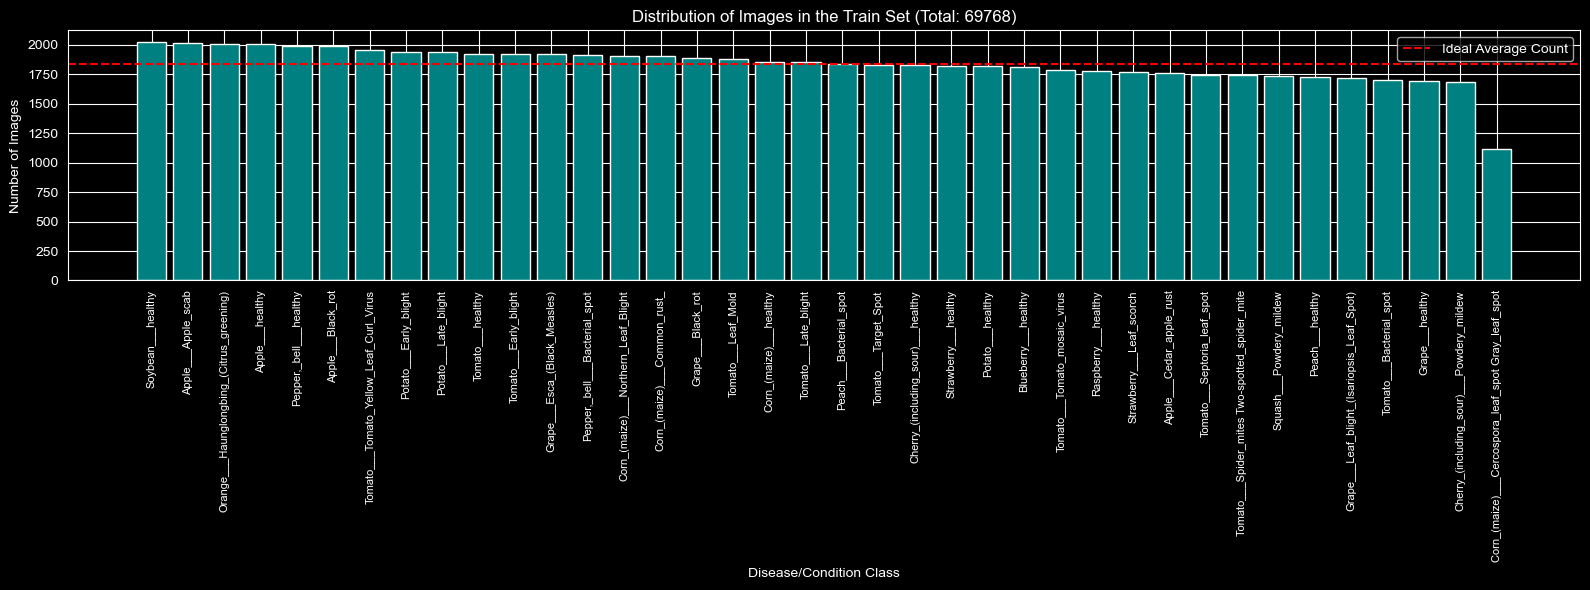

In [5]:
visualize_split_results(df,ideal_count,split_name,total_images)

In [6]:
df,ideal_count,split_name,total_images=analyze_split('Validation', valid_path)


       ANALYSIS FOR: Validation SET
Total images in Validation set: 17452

--- Imbalance Summary ---
Number of Classes: 38
Average Images per Class (Ideal): 459
Smallest Class Size: 290 (Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot)
Largest Class Size: 505 (Soybean___healthy)

✅ **Conclusion: The Validation set appears to be reasonably balanced.**


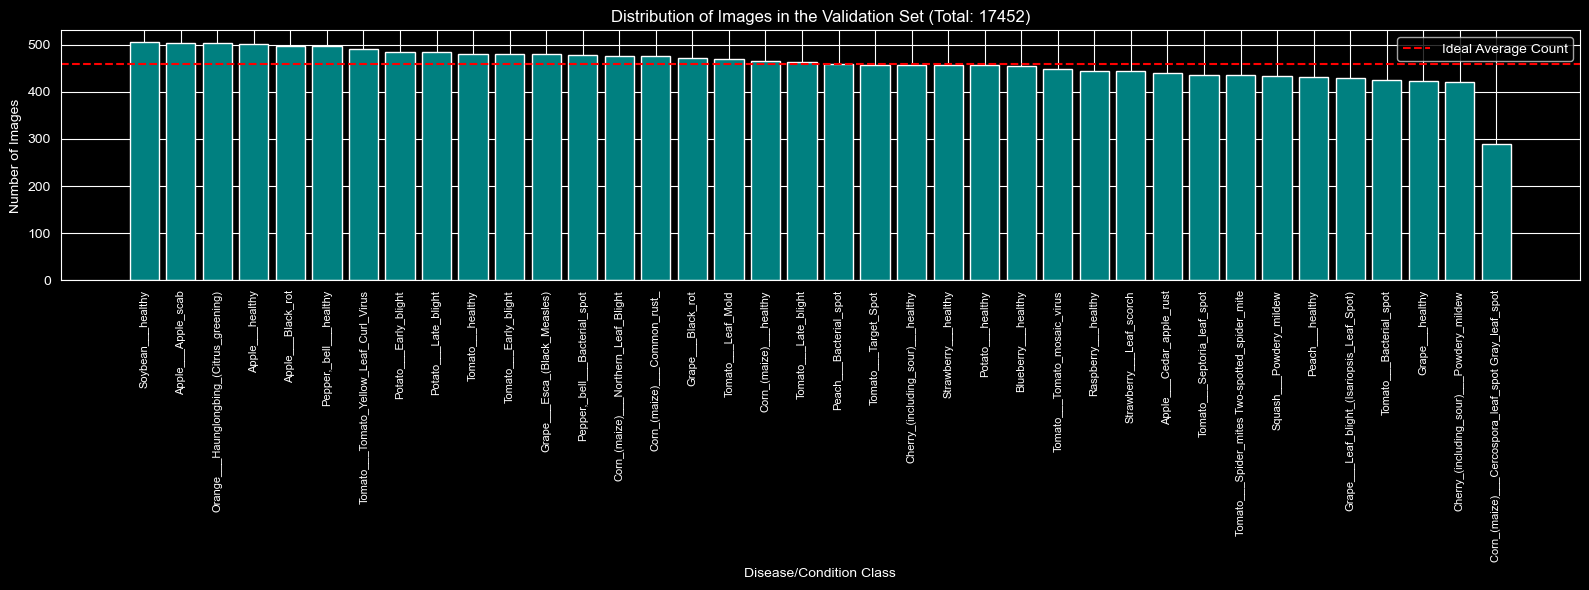

In [7]:
visualize_split_results(df,ideal_count,split_name,total_images)

In [8]:
IMG_SIZE = 224
BATCH_SIZE = 32
train_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4768168032169342, 0.5012436509132385, 0.4276201128959656], std=[0.17313140630722046, 0.1456347107887268, 0.19238317012786865]),
])
test_transforms = train_transforms

# NEW CLEAN BASE DIRECTORY
clean_base_dir = os.path.join(ROOT_DIR, "Filtered_Plant_Dataset")
os.makedirs(clean_base_dir, exist_ok=True)
print(f"Created new clean directory base: {clean_base_dir}")


# --- 2. LOAD DATASET METADATA ---
# Use ImageFolder to scan the data and get the samples list
train_dataset = datasets.ImageFolder(root=train_path, transform=train_transforms)
val_dataset   = datasets.ImageFolder(root=valid_path,   transform=test_transforms)

# The class names are required to create the new folders
class_names = train_dataset.classes
class_idx_to_name = {v: k for k, v in train_dataset.class_to_idx.items()}

copy_valid_samples(train_dataset, "train", class_names, clean_base_dir, class_idx_to_name)
copy_valid_samples(val_dataset, "valid", class_names, clean_base_dir, class_idx_to_name)

print("\n✨ **Process Complete.**")
print(f"Your clean, filtered dataset is ready at: {clean_base_dir}")

Created new clean directory base: C:\Users\azeem\PycharmProjects\ImageProcessingSemesterProject\Filtered_Plant_Dataset

Processing train set...
--- train Summary ---
Total valid images copied: 69768
Total missing files skipped: 527
⚠️ NOTE: The original dataset structure had missing file entries.

Processing valid set...
--- valid Summary ---
Total valid images copied: 17452
Total missing files skipped: 120
⚠️ NOTE: The original dataset structure had missing file entries.

✨ **Process Complete.**
Your clean, filtered dataset is ready at: C:\Users\azeem\PycharmProjects\ImageProcessingSemesterProject\Filtered_Plant_Dataset


In [9]:

mean, std = calculate_normalization_stats(clean_base_dir)
print(f"Mean: {mean}, Std: {std}")

📊 Calculating stats for dataset at: C:\Users\azeem\PycharmProjects\ImageProcessingSemesterProject\Filtered_Plant_Dataset


Computing Mean/Std: 100%|██████████| 1363/1363 [05:19<00:00,  4.26batch/s]


✅ Calculation Complete!
Mean: [0.4768168032169342, 0.5012436509132385, 0.4276201128959656]
Std:  [0.17313140630722046, 0.1456347107887268, 0.19238317012786865]
Mean: tensor([0.4768, 0.5012, 0.4276]), Std: tensor([0.1731, 0.1456, 0.1924])


In [10]:
combined_path = os.path.join(ROOT_DIR, 'Combined_Dataset')
if not os.path.exists(combined_path):
    os.makedirs(combined_path)
    print(f"Created new combined directory: {combined_path}")
else:
    print(f"Combined directory already exists: {combined_path}")

merge_data(train_path, combined_path, action='copy')
merge_data(valid_path, combined_path, action='copy')

print(f"✨ **MERGE COMPLETE!**")
print(f"All images are now consolidated under: {combined_path}")

Created new combined directory: C:\Users\azeem\PycharmProjects\ImageProcessingSemesterProject\Combined_Dataset

Processing data from: train...
  -> Merged 2016 images into class 'Apple___Apple_scab'
  -> Merged 1987 images into class 'Apple___Black_rot'
  -> Merged 1760 images into class 'Apple___Cedar_apple_rust'
  -> Merged 2008 images into class 'Apple___healthy'
  -> Merged 1816 images into class 'Blueberry___healthy'
  -> Merged 1826 images into class 'Cherry_(including_sour)___healthy'
  -> Merged 1683 images into class 'Cherry_(including_sour)___Powdery_mildew'
  -> Merged 1115 images into class 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
  -> Merged 1907 images into class 'Corn_(maize)___Common_rust_'
  -> Merged 1859 images into class 'Corn_(maize)___healthy'
  -> Merged 1908 images into class 'Corn_(maize)___Northern_Leaf_Blight'
  -> Merged 1888 images into class 'Grape___Black_rot'
  -> Merged 1920 images into class 'Grape___Esca_(Black_Measles)'
  -> Merged 1692 i

In [11]:
df,ideal_count,split_name,total_images=analyze_split('Combined', combined_path)


       ANALYSIS FOR: Combined SET
Total images in Combined set: 87220

--- Imbalance Summary ---
Number of Classes: 38
Average Images per Class (Ideal): 2295
Smallest Class Size: 1405 (Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot)
Largest Class Size: 2527 (Soybean___healthy)

✅ **Conclusion: The Combined set appears to be reasonably balanced.**


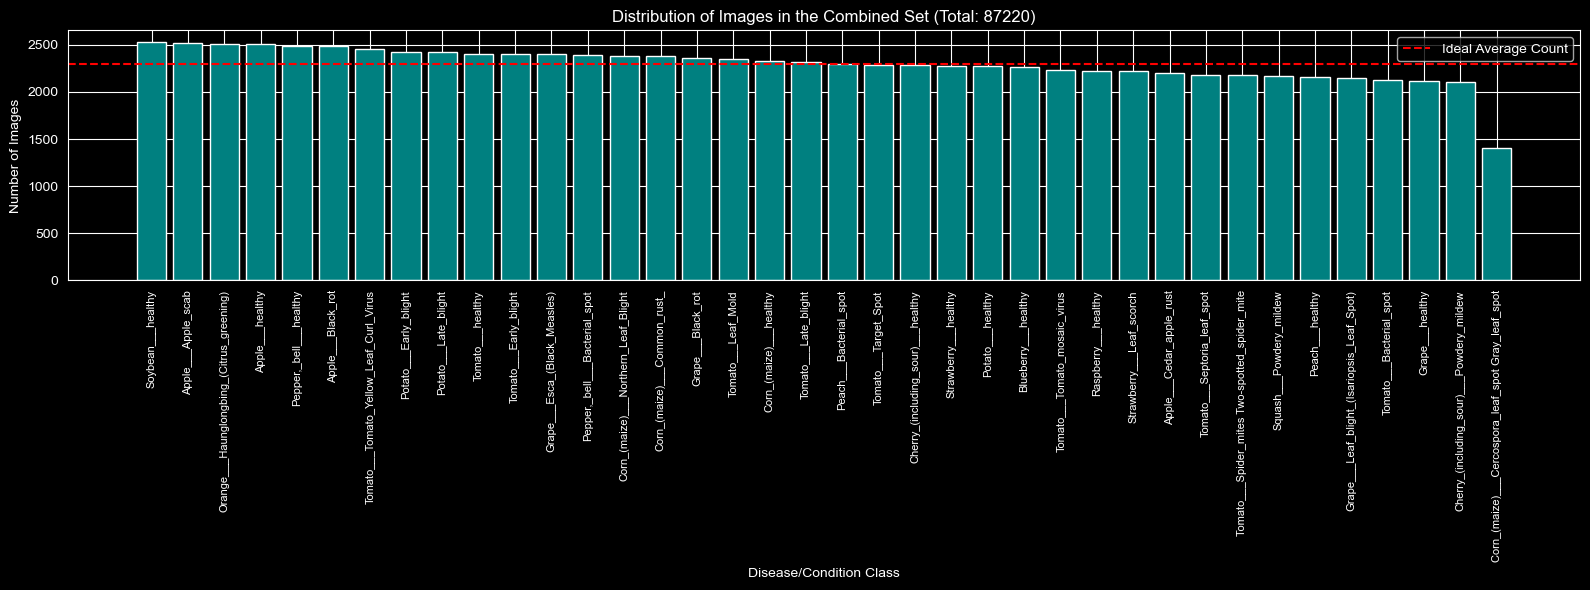

In [12]:
visualize_split_results(df,ideal_count,split_name,total_images)

In [13]:
filepaths,labels=ScanFilesForFilePathsAndLabels(combined_path)

In [14]:
NEW_SPLIT_ROOT = os.path.join(ROOT_DIR, 'Final_Split_Dataset')
TRAIN_SPLIT_DIR = os.path.join(NEW_SPLIT_ROOT, 'Filtered_Train')
VAL_SPLIT_DIR   = os.path.join(NEW_SPLIT_ROOT, 'Filtered_Validation')
TEST_SPLIT_DIR  = os.path.join(NEW_SPLIT_ROOT, 'Filtered_Test')

TRAIN_RATIO = 0.80
TEST_RATIO  = 0.10
VAL_RATIO   = 0.10

train_files, val_test_files, train_labels, val_test_labels = train_test_split(
    filepaths,
    labels,
    test_size=(VAL_RATIO + TEST_RATIO), # 0.10 + 0.10 = 0.20
    random_state=42, # Set for reproducibility
    stratify=labels
)

val_files, test_files, val_labels, test_labels = train_test_split(
    val_test_files,
    val_test_labels,
    test_size=TEST_RATIO / (VAL_RATIO + TEST_RATIO), # 0.10 / 0.20 = 0.5 (half to test, half to val)
    random_state=42,
    stratify=val_test_labels
)

splits = [
    (TRAIN_SPLIT_DIR, train_files, train_labels, "Training"),
    (VAL_SPLIT_DIR, val_files, val_labels, "Validation"),
    (TEST_SPLIT_DIR, test_files, test_labels, "Testing")
]


os.makedirs(NEW_SPLIT_ROOT, exist_ok=True)
print(f"\nCreated new split root directory: {NEW_SPLIT_ROOT}")

final_counts = {}
for target_dir, file_list, _, name in splits:
    final_counts[name] = copy_files_to_split(target_dir, file_list, name)

# --- 6. FINAL SUMMARY ---
total_files = sum(final_counts.values())

print("STRATIFIED SPLIT AND COPY COMPLETE!")
print(f"Total files processed: {total_files}")
print(f"Train Count ({TRAIN_RATIO*100:.0f}%): {final_counts['Training']} ({final_counts['Training']/total_files*100:.2f}%)")
print(f"Validation Count ({VAL_RATIO*100:.0f}%): {final_counts['Validation']} ({final_counts['Validation']/total_files*100:.2f}%)")
print(f"Test Count ({TEST_RATIO*100:.0f}%): {final_counts['Testing']} ({final_counts['Testing']/total_files*100:.2f}%)")
print(f"New dataset location: {NEW_SPLIT_ROOT}")


Created new split root directory: C:\Users\azeem\PycharmProjects\ImageProcessingSemesterProject\Final_Split_Dataset

Copying files for Training split...
✅ Training Split Complete. Total files copied: 69776

Copying files for Validation split...
✅ Validation Split Complete. Total files copied: 8722

Copying files for Testing split...
✅ Testing Split Complete. Total files copied: 8722
STRATIFIED SPLIT AND COPY COMPLETE!
Total files processed: 87220
Train Count (80%): 69776 (80.00%)
Validation Count (10%): 8722 (10.00%)
Test Count (10%): 8722 (10.00%)
New dataset location: C:\Users\azeem\PycharmProjects\ImageProcessingSemesterProject\Final_Split_Dataset
